In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run52-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20230823-DataSheet-RUN52.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,Constant,MID,HEK_cells,Group,RACE,Sample
0,N701_S502,AB-RTX56-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1,...,TCRb,10-01-0003,V6_M12,yes,no,NaN,no,NaN,no,AB-RTX56-Tu_S1
1,N702_S502,AB-RTX58-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,...,TCRb,10-01-0007,V6_M12,yes,no,NaN,no,NaN,no,AB-RTX58-Tu_S2
2,N703_S502,AB-RTX59-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3,...,TCRb,10-04-0007,V6_M12,yes,no,NaN,no,NaN,no,AB-RTX59-Tu_S3
3,N704_S502,AB-RTX60-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S4,...,TCRb,40-01-0014,V6_M12,yes,no,NaN,no,NaN,no,AB-RTX60-Tu_S4
4,N705_S502,AB-RTX61-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S5,...,TCRb,40-01-0016,V6_M12,yes,no,NaN,no,NaN,no,AB-RTX61-Tu_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles = [x for x in myfiles if "TRB_HUMAN" in x]
myfiles.sort()
myfiles

['cdr3-clones-AB-RTX-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-Target2B-TRB_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,AB-RTX114-Tu_S6,CASSLFGEMGEQFFG,2644
1,AB-RTX114-Tu_S6,CASFPGGPHQPQHFG,702
2,AB-RTX114-Tu_S6,CSARDRGETEAFFG,636
3,AB-RTX114-Tu_S6,CSVSKGGLYTGELFFG,236
4,AB-RTX114-Tu_S6,CSPDRFAPGELFFG,234


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
554786,IEI048-T_S111,CVSSTPWKENDQPQHFG,1
554787,IEI048-T_S111,CVTGANVLTFG,1
554788,IEI048-T_S111,CVTSDLEGDTQYFG,1
554789,IEI048-T_S111,CVTSRDRGTENTGELFFG,1
554790,IEI048-T_S111,CVTSTVGLALSSYNEQFFG,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,Constant,MID,HEK_cells,Group,RACE
0,AB-RTX114-Tu_S6,CASSLFGEMGEQFFG,2644,N706_S502,AB-RTX114-Tu,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,10-01-0012,V6_M12,yes,no,NaN,no,NaN,no
1,AB-RTX114-Tu_S6,CASFPGGPHQPQHFG,702,N706_S502,AB-RTX114-Tu,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,10-01-0012,V6_M12,yes,no,NaN,no,NaN,no
2,AB-RTX114-Tu_S6,CSARDRGETEAFFG,636,N706_S502,AB-RTX114-Tu,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,10-01-0012,V6_M12,yes,no,NaN,no,NaN,no
3,AB-RTX114-Tu_S6,CSVSKGGLYTGELFFG,236,N706_S502,AB-RTX114-Tu,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,10-01-0012,V6_M12,yes,no,NaN,no,NaN,no
4,AB-RTX114-Tu_S6,CSPDRFAPGELFFG,234,N706_S502,AB-RTX114-Tu,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,10-01-0012,V6_M12,yes,no,NaN,no,NaN,no


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,1,IEI048-T_S111,CAAAGLATYNEQFFG,1
1,1,IEI048-T_S111,CAAASGHQETQYFG,1
2,1,IEI048-T_S111,CAAATRRGTDTQYFG,2
3,1,IEI048-T_S111,CAACPWLAGGSEQFFG,3
4,1,IEI048-T_S111,CAACSGRPYNEQFFG,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,AB-RTX114-Tu_S6,62711
1,AB-RTX115-Tu_S7,72060
2,AB-RTX116-Tu_S8,62001
3,AB-RTX117-Tu_S17,56670
4,AB-RTX118-Tu_S18,72296


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,1,IEI048-T_S111,CAAAGLATYNEQFFG,1,53682
1,1,IEI048-T_S111,CAAASGHQETQYFG,1,53682
2,1,IEI048-T_S111,CAAATRRGTDTQYFG,2,53682
3,1,IEI048-T_S111,CAACPWLAGGSEQFFG,3,53682
4,1,IEI048-T_S111,CAACSGRPYNEQFFG,1,53682


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
1028860,9,IEI039-T_S94,CVSSTRTGKNPTDTQYFG,1,51947
1028861,9,IEI039-T_S94,CVSSYRAGREYFG,1,51947
1028862,9,IEI039-T_S94,CVSTPPGGVRPQHFG,1,51947
1028863,9,IEI039-T_S94,CVTCFSGGVSYNEQFFG,1,51947
1028864,9,IEI039-T_S94,CVTSDLGTSQETQYFG,1,51947


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,1,IEI048-T_S111,CAAAGLATYNEQFFG,1,53682,0.001863
1,1,IEI048-T_S111,CAAASGHQETQYFG,1,53682,0.001863
2,1,IEI048-T_S111,CAAATRRGTDTQYFG,2,53682,0.003726
3,1,IEI048-T_S111,CAACPWLAGGSEQFFG,3,53682,0.005588
4,1,IEI048-T_S111,CAACSGRPYNEQFFG,1,53682,0.001863


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['IEI048-T_S111',
 'AB-RTX135-Tu_S51',
 'AB-RTX136-Tu_S52',
 'AB-RTX56-Tu_S1',
 'AB-RTX137-Tu_S53',
 'AB-RTX138-Tu_S54',
 'AB-RTX58-Tu_S2',
 'AB-RTX114-Tu_S6',
 'AB-RTX139-Tu_S55',
 'AB-RTX140-Tu_S56']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,AB-RTX135-Tu_S51,IEI048-T_S111,2.310729,0.860624
1,AB-RTX136-Tu_S52,IEI048-T_S111,2.431694,1.561045
2,IEI048-T_S111,AB-RTX56-Tu_S1,2.654521,2.608522
3,AB-RTX137-Tu_S53,IEI048-T_S111,2.485562,0.635222
4,AB-RTX138-Tu_S54,IEI048-T_S111,2.695582,0.720912


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,AB-RTX135-Tu_S51,IEI048-T_S111,2.310729,0.860624,10-01-0003,1
1,AB-RTX136-Tu_S52,IEI048-T_S111,2.431694,1.561045,10-01-0003,1
2,AB-RTX137-Tu_S53,IEI048-T_S111,2.485562,0.635222,10-01-0007,1
3,AB-RTX138-Tu_S54,IEI048-T_S111,2.695582,0.720912,10-01-0007,1
4,AB-RTX58-Tu_S2,IEI048-T_S111,2.318157,0.944451,10-01-0007,1


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1439,AB-RTX60-Tu_S4,AB-RTX118-Tu_S18,45.596187,41.413080,40-01-0014,40-01-0014
1,977,AB-RTX127-Tu_S35,AB-RTX128-Tu_S36,43.766152,40.444655,40-14-0005,40-14-0005
2,829,AB-RTX60-Tu_S4,AB-RTX117-Tu_S17,48.274352,37.404270,40-01-0014,40-01-0014
3,828,AB-RTX118-Tu_S18,AB-RTX117-Tu_S17,41.695253,35.041468,40-01-0014,40-01-0014
4,1077,AB-RTX134-Tu_S50,AB-RTX132-Tu_S40,43.454269,33.226666,40-18-0004,40-18-0004


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1439,AB-RTX60-Tu_S4,AB-RTX118-Tu_S18,45.596187,41.413080,40-01-0014,40-01-0014,same
1,977,AB-RTX127-Tu_S35,AB-RTX128-Tu_S36,43.766152,40.444655,40-14-0005,40-14-0005,same
2,829,AB-RTX60-Tu_S4,AB-RTX117-Tu_S17,48.274352,37.404270,40-01-0014,40-01-0014,same
3,828,AB-RTX118-Tu_S18,AB-RTX117-Tu_S17,41.695253,35.041468,40-01-0014,40-01-0014,same
4,1077,AB-RTX134-Tu_S50,AB-RTX132-Tu_S40,43.454269,33.226666,40-18-0004,40-18-0004,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run52-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1439,AB-RTX60-Tu_S4,AB-RTX118-Tu_S18,45.596187,41.413080,40-01-0014,40-01-0014,same
1,1,977,AB-RTX127-Tu_S35,AB-RTX128-Tu_S36,43.766152,40.444655,40-14-0005,40-14-0005,same
2,2,829,AB-RTX60-Tu_S4,AB-RTX117-Tu_S17,48.274352,37.404270,40-01-0014,40-01-0014,same
3,3,828,AB-RTX118-Tu_S18,AB-RTX117-Tu_S17,41.695253,35.041468,40-01-0014,40-01-0014,same
4,4,1077,AB-RTX134-Tu_S50,AB-RTX132-Tu_S40,43.454269,33.226666,40-18-0004,40-18-0004,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1439,AB-RTX60-Tu_S4,AB-RTX118-Tu_S18,45.596187,41.413080,40-01-0014,40-01-0014,same,AB-RTX60-Tu_S4->AB-RTX118-Tu_S18,purple
1,1,977,AB-RTX127-Tu_S35,AB-RTX128-Tu_S36,43.766152,40.444655,40-14-0005,40-14-0005,same,AB-RTX127-Tu_S35->AB-RTX128-Tu_S36,purple
2,2,829,AB-RTX60-Tu_S4,AB-RTX117-Tu_S17,48.274352,37.404270,40-01-0014,40-01-0014,same,AB-RTX60-Tu_S4->AB-RTX117-Tu_S17,purple
3,3,828,AB-RTX118-Tu_S18,AB-RTX117-Tu_S17,41.695253,35.041468,40-01-0014,40-01-0014,same,AB-RTX118-Tu_S18->AB-RTX117-Tu_S17,purple
4,4,1077,AB-RTX134-Tu_S50,AB-RTX132-Tu_S40,43.454269,33.226666,40-18-0004,40-18-0004,same,AB-RTX134-Tu_S50->AB-RTX132-Tu_S40,purple


Wrote run52-TRB-HUMAN-shared-clones-all.pdf to disk


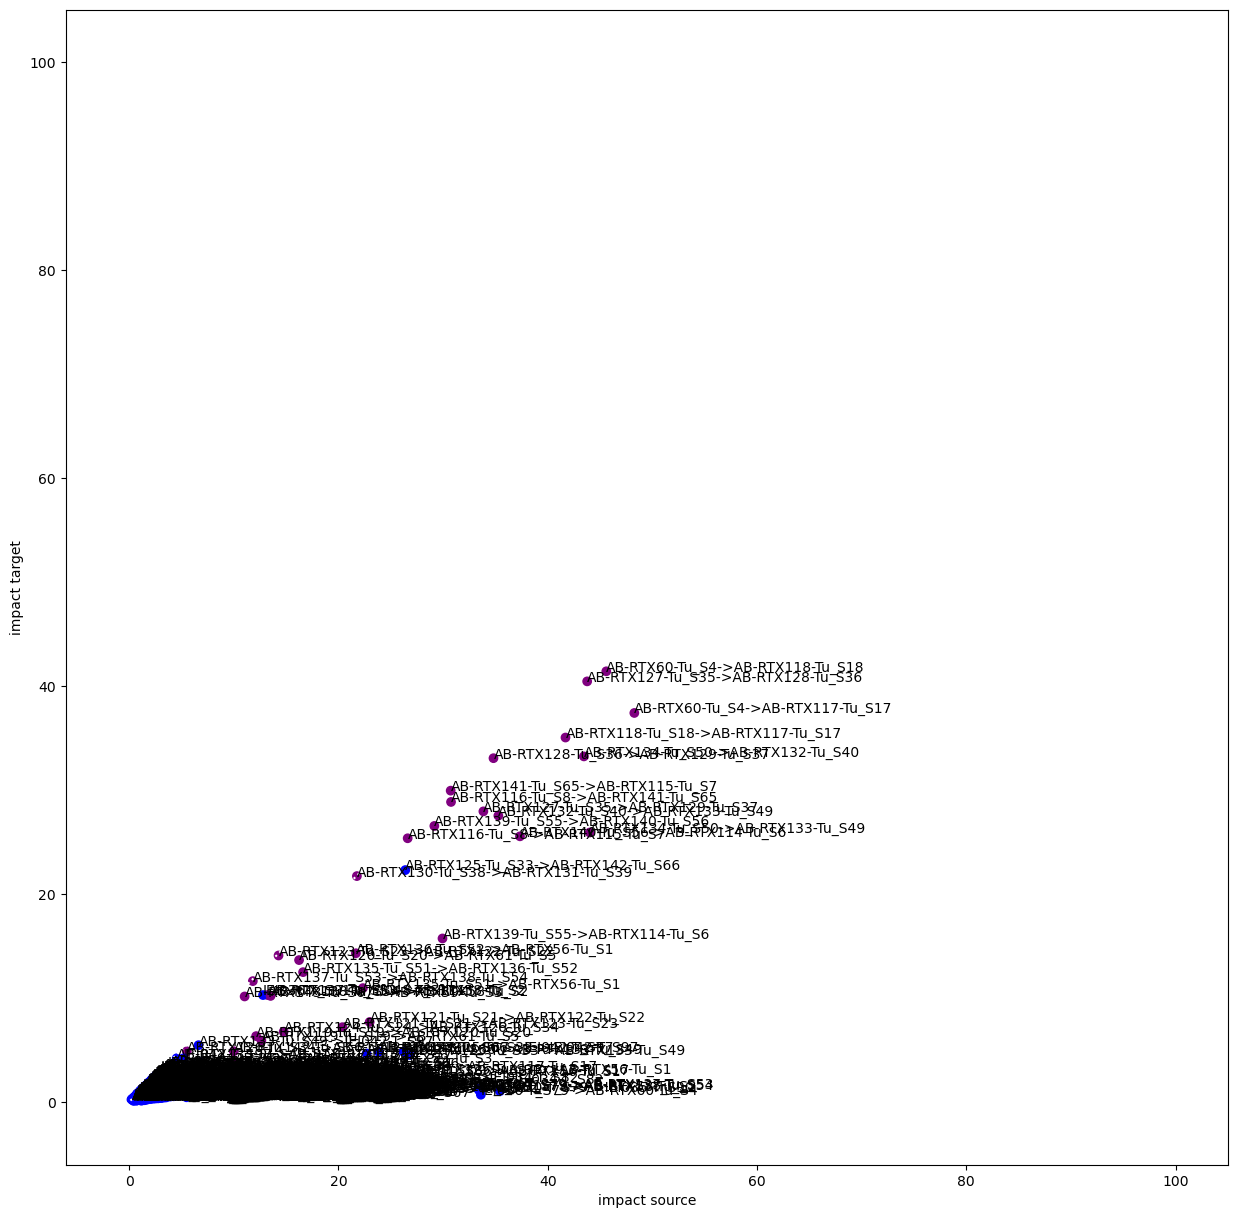

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,14,AB-RTX125-Tu_S33,AB-RTX142-Tu_S66,26.385727,22.292601,different,AB-RTX125-Tu_S33->AB-RTX142-Tu_S66,blue
1,24,IEI036-T_S91,IEI048-T_S111,12.788602,10.269737,different,IEI036-T_S91->IEI048-T_S111,blue
2,32,AB-RTX133-Tu_S49,IEI042-T_S97,6.624961,5.448014,different,AB-RTX133-Tu_S49->IEI042-T_S97,blue
3,35,AB-RTX125-Tu_S33,IEI042-T_S97,26.207321,4.819993,different,AB-RTX125-Tu_S33->IEI042-T_S97,blue
4,36,AB-RTX142-Tu_S66,IEI042-T_S97,23.823348,4.814824,different,AB-RTX142-Tu_S66->IEI042-T_S97,blue


Wrote run52-TRB-HUMAN-shared-clones-different-ids.pdf to disk


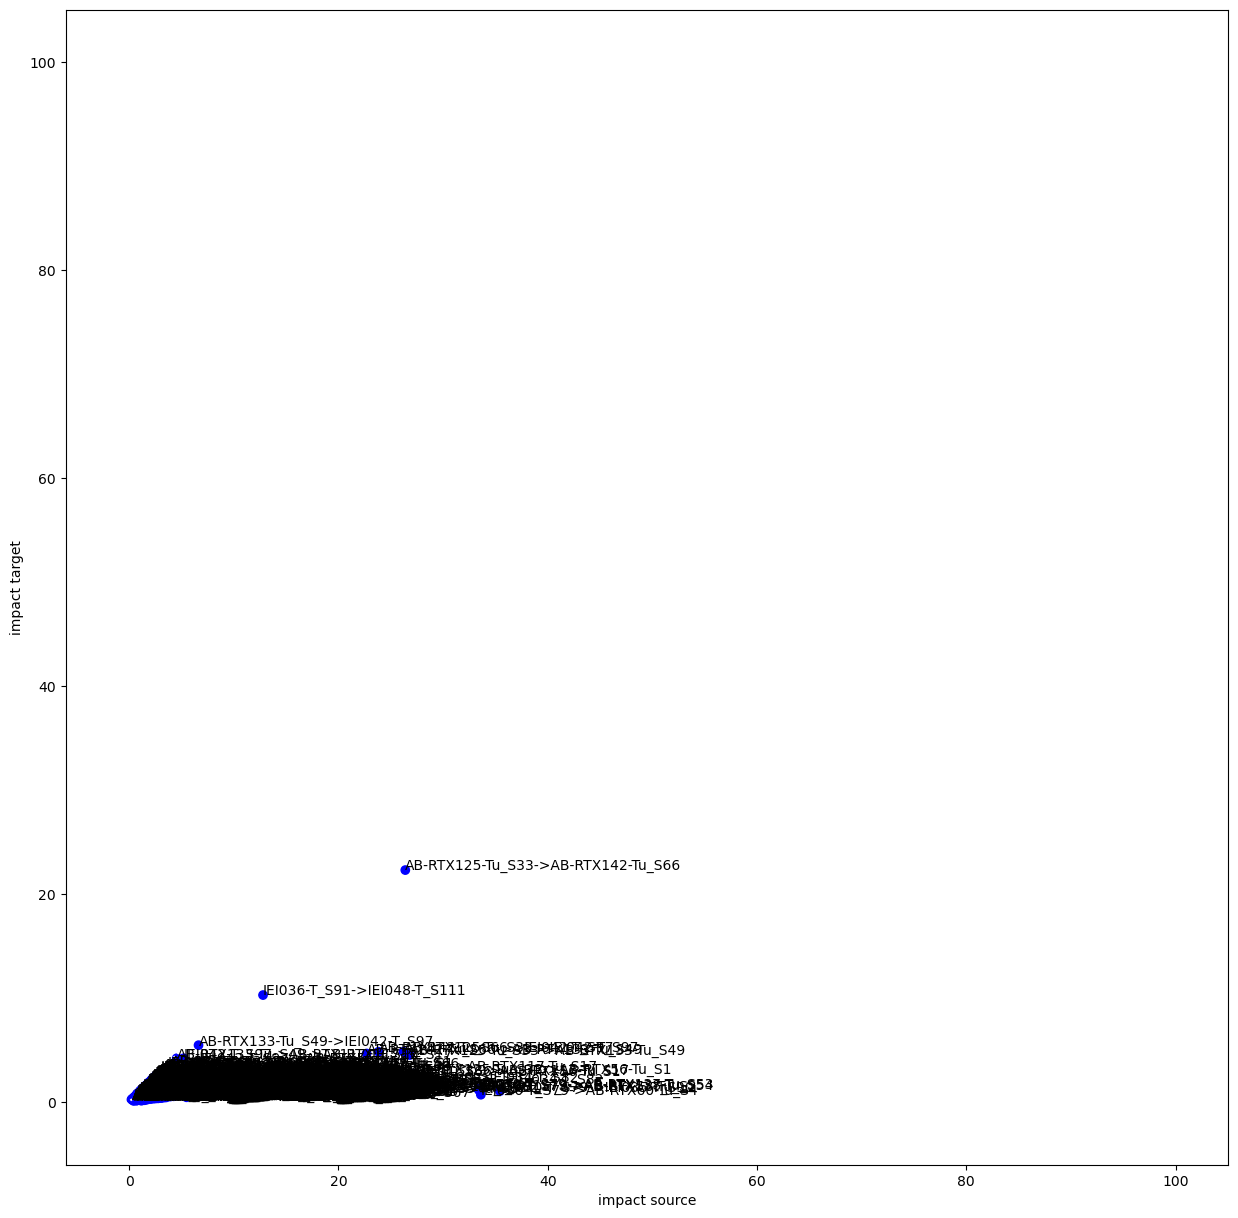

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,1,IEI048-T_S111,CAAAGLATYNEQFFG,1,53682,0.001863
1,1,IEI048-T_S111,CAAASGHQETQYFG,1,53682,0.001863
2,1,IEI048-T_S111,CAAATRRGTDTQYFG,2,53682,0.003726
3,1,IEI048-T_S111,CAACPWLAGGSEQFFG,3,53682,0.005588
4,1,IEI048-T_S111,CAACSGRPYNEQFFG,1,53682,0.001863


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient              Sample  \
                 nunique  <lambda_0> nunique   
cdr3pep                                        
CAAAAGRSTDTQYFG        1  40-14-0005       1   
CAAAAGSFNQPQHFG        1  10-01-0012       2   
CAAAAGYPYNEQFFG        1  10-04-0007       1   
CAAAATDTQYFG           1  10-04-0007       1   
CAAAAVAGDDNEQFFG       1          13       1   

                                                     
                                         <lambda_0>  
cdr3pep                                              
CAAAAGRSTDTQYFG                    AB-RTX127-Tu_S35  
CAAAAGSFNQPQHFG   AB-RTX114-Tu_S6, AB-RTX140-Tu_S56  
CAAAAGYPYNEQFFG                    AB-RTX142-Tu_S66  
CAAAATDTQYFG                       AB-RTX143-Tu_S67  
CAAAAVAGDDNEQFFG                       IEI036-T_S91

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient           cdr3pep             1       10-01-0003                   \
Sample                    IEI048-T_S111 AB-RTX135-Tu_S51 AB-RTX136-Tu_S52   
0         CAAAAGRSTDTQYFG           NaN              NaN              NaN   
1         CAAAAGSFNQPQHFG           NaN              NaN              NaN   
2         CAAAAGYPYNEQFFG           NaN              NaN              NaN   
3            CAAAATDTQYFG           NaN              NaN              NaN   
4        CAAAAVAGDDNEQFFG           NaN              NaN              NaN   

Patient                      10-01-0007                                  \
Sample  AB-RTX56-Tu_S1 AB-RTX137-Tu_S53 AB-RTX138-Tu_S54 AB-RTX58-Tu_S2   
0                  NaN              NaN              NaN            NaN   
1                  NaN              NaN              NaN            NaN   
2                  NaN              NaN              NaN            NaN   
3                  NaN              NaN              NaN            NaN   
4                  NaN              NaN              NaN            NaN   

Patient      10-01-0012                   ...       40-15-0002  \
Sample  AB-RTX114-Tu_S6 AB-RTX139-Tu_S55  ... AB-RTX130-Tu_S38   
0                   NaN              NaN  ...              NaN   
1              0.003189              NaN  ...              NaN   
2                   NaN              NaN  ...              NaN   
3                   NaN              NaN  ...              NaN   
4                   NaN              NaN  ...              NaN   

Patient                        40-18-0004                                    \
Sample  AB-RTX131-Tu_S39 AB-RTX132-Tu_S40 AB-RTX133-Tu_S49 AB-RTX134-Tu_S50   
0                    NaN              NaN              NaN              NaN   
1                    NaN              NaN              NaN              NaN   
2                    NaN              NaN              NaN              NaN   
3                    NaN              NaN              NaN              NaN   
4                    NaN              NaN              NaN              NaN   

Patient            5            6            7            9               
Sample  IEI030-T_S79 IEI031-T_S80 IEI038-T_S93 IEI033-T_S81 IEI039-T_S94  
0                NaN          NaN          NaN          NaN          NaN  
1                NaN          NaN          NaN          NaN          NaN  
2                NaN          NaN          NaN          NaN          NaN  
3                NaN          NaN          NaN          NaN          NaN  
4                NaN          NaN          NaN          NaN          NaN  

[5 rows x 57 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/envs/reseda/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index       cdr3pep Patient  \
                        nunique   
0  167508        CASSFG      30   
1  257150  CASSLEETQYFG      28   
2  179490  CASSFQETQYFG      28   
3  563207       CASSYFG      28   
4  525820  CASSSTDTQYFG      27   

                                                      Sample  \
                                          <lambda_0> nunique   
0  3, 16, 10-04-0007, 7, 10-02-0009, 5, 10-01-000...      56   
1  3, 16, 10-04-0007, 7, 10-02-0009, 5, 10-01-000...      39   
2  3, 16, 10-04-0007, 7, 10-02-0009, 5, 10-01-000...      38   
3  3, 16, 10-04-0007, 7, 10-02-0009, 10-01-0003, ...      34   
4  3, 16, 10-04-0007, 7, 10-02-0009, 10-01-0003, ...      42   

                                                                 1  \
                                          <lambda_0> IEI048-T_S111   
0  AB-RTX59-Tu_S3, AB-RTX132-Tu_S40, AB-RTX119-Tu...      0.139712   
1  AB-RTX59-Tu_S3, AB-RTX132-Tu_S40, AB-RTX119-Tu...      0.020491   
2  AB-RTX132-Tu_S40, AB-RTX143-Tu_S67, AB-RTX142-...      0.005588   
3  AB-RTX132-Tu_S40, AB-RTX119-Tu_S19, AB-RTX143-...      0.014903   
4  AB-RTX59-Tu_S3, AB-RTX132-Tu_S40, AB-RTX127-Tu...      0.009314   

        10-01-0003                                  ...       40-15-0002  \
  AB-RTX135-Tu_S51 AB-RTX136-Tu_S52 AB-RTX56-Tu_S1  ... AB-RTX130-Tu_S38   
0         0.176111         0.206238       0.244014  ...         0.220072   
1              NaN         0.003197       0.008562  ...         0.003638   
2              NaN              NaN       0.004281  ...         0.005456   
3              NaN              NaN       0.011416  ...         0.005456   
4              NaN         0.003197            NaN  ...         0.009094   

                         40-18-0004                                    \
  AB-RTX131-Tu_S39 AB-RTX132-Tu_S40 AB-RTX133-Tu_S49 AB-RTX134-Tu_S50   
0         0.152735         0.188237         0.157523         0.079644   
1              NaN         0.002896         0.009001         0.005689   
2         0.019415         0.001448         0.006751         0.004267   
3              NaN         0.005792         0.004501              NaN   
4         0.002589         0.004344         0.006751         0.008533   

             5            6            7            9               
  IEI030-T_S79 IEI031-T_S80 IEI038-T_S93 IEI033-T_S81 IEI039-T_S94  
0     0.065636     0.214340     0.270450     0.183957     0.234855  
1     0.003646     0.009669     0.010091     0.013571     0.009625  
2     0.003646     0.006446     0.044402     0.012063     0.013475  
3          NaN     0.003223     0.018165     0.004524     0.021175  
4          NaN     0.004835     0.002018     0.001508     0.007700  

[5 rows x 62 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 890753
cdr3's in > 1 sample: 76636


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run52-TRB-HUMAN-shared-clones-occurrence.xlsx to disk
